In [2]:
from BellmanFord import bellman_ford
from SPmain import SPmain
import networkx as nx
import random
import numpy as np
import time
import matplotlib.pyplot as plt

## Simulate graphs randomly

In [4]:
# Generates a random graph with no negative cycles
def GenerateGraph(n, m , s, minWeight, MaxWeight):
    G = None
    while G is None:
        G = nx.gnm_random_graph(n, m, directed = True)
        for (u, v) in G.edges():
            G.edges[u,v]['weight'] = random.randint(minWeight,MaxWeight)
        try:
            nx.find_negative_cycle(G, s)
            G = None
        except nx.NetworkXError as err:
            if str(err) == "No negative cycles detected.":
                break
            else:
                G = None
    return G

ns = np.arange(10,150,3)
generationDict = {}
for i, n in enumerate(ns):
    generationDict[i] = GenerateGraph(n, n*n, 0, -2*(i+1), n*n)

## Bellman-Ford Algorithm Runtime

In [5]:
bellman_ford_times = [0] * len(ns)
for k, G in generationDict.items():
    st = time.time()
    bellman_ford(G, 0)
    et = time.time()
    bellman_ford_times[k] = et - st

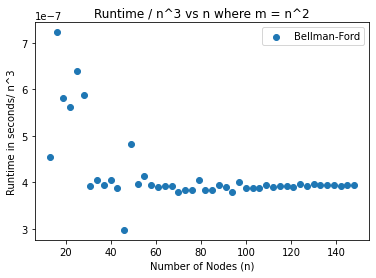

In [10]:
x = ns[1:]
y = (bellman_ford_times / (ns**3))[1:]

plt.scatter(x, y, label = 'Bellman-Ford')
plt.xlabel('Number of Nodes (n)')
plt.ylabel('Runtime in seconds/ n^3')
plt.title('Runtime / n^3 vs n where m = n^2')
plt.legend()
plt.show()

## Bernstein-Nanongkai-Wulff-Nilsen Algorithm Runtime

In [11]:
bernstein_times = [0] * len(ns)
for k, G in generationDict.items():
    st = time.time()
    SPmain(G, 0)
    et = time.time()
    bernstein_times[k] = et - st

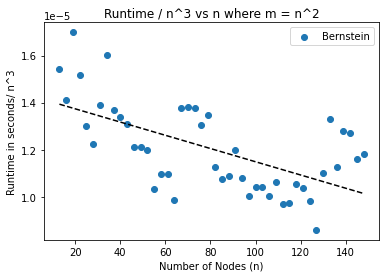

In [13]:
x = ns[1:]
y = (bernstein_times / (ns**3))[1:]

plt.scatter(x, y, label = 'Bernstein')
plt.xlabel('Number of Nodes (n)')
plt.ylabel('Runtime in seconds/ n^3')
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b, 'k--')
plt.title('Runtime / n^3 vs n where m = n^2')
plt.legend()
plt.show()